In [1]:
#importing all the required python libraries 
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
# from shapely.geometry import Point
# import folium
# from folium.plugins import MarkerCluster
# from folium.plugins import FastMarkerCluster


###### Importing the Airlines performance data for the month before the onset of COVID i.e. Feb20

In [6]:
States= gpd.read_file('../data/US_States.geojson')

In [7]:
States.head()

,name,country,ISO3166-1-Alpha-3,state_code,id,geometry
0,Minnesota,United States of America,USA,MN,USA-3514,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,United States of America,USA,MT,USA-3515,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,United States of America,USA,ND,USA-3516,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Hawaii,United States of America,USA,HI,USA-3517,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,Idaho,United States of America,USA,ID,USA-3518,"POLYGON ((-111.04973 44.48816, -111.05024 42.0..."


###### The following code will make all the out put dataframes be in a table format 

In [53]:

%%HTML
<style type ="text/css">
table.dataframe td, table.dataframe th {
    border: 1px black solid  !important;
 color: black !important;
}

In [8]:
Airports=pd.read_csv('../data/US_Airports.csv')

In [44]:
Airports.head()

,iata,name,city,state,country,latitude,longitude
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [10]:
Airports.shape

(3376, 7)

<AxesSubplot:>

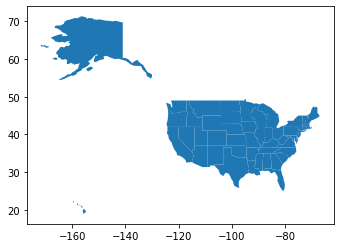

In [11]:
States.plot()

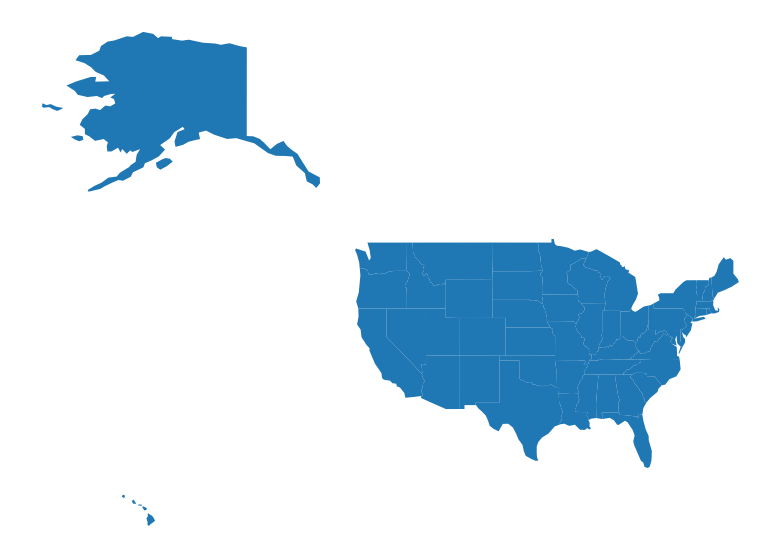

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
States.plot(ax = ax)
ax.axis('off');

In [15]:
OTPFeb20 =pd.read_csv('../data/Airlines OTP February20.csv',low_memory=False)

In [14]:
OTPFeb20.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate
0,2020,1,2,1,6,2/1/2020,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2020,1,2,8,6,2/8/2020,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2020,1,2,13,4,2/13/2020,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,2020,1,2,14,5,2/14/2020,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,2020,1,2,15,6,2/15/2020,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [16]:
OTPFeb20.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       ...
       'Div4TailNum', 'Div5Airport', 'Div5AirportID', 'Div5AirportSeqID',
       'Div5WheelsOn', 'Div5TotalGTime', 'Div5LongestGTime', 'Div5WheelsOff',
       'Div5TailNum', 'Duplicate'],
      dtype='object', length=119)

In [17]:
OTPFeb20.shape

(623103, 119)

###### Removing all the unnecessary columns from OTPFeb20 Data frame and Keep the data frame one the remaining columns 

In [55]:

# OTPFeb20 = OTPFeb20.loc[['Year','Month','DayofMonth','DayOfWeek','FlightDate','DOT_ID_Marketing_Airline','IATA_Code_Marketing_Airline',
# 'Flight_Number_Marketing_Airline','Operating_Airline','Flight_Number_Operating_Airline','OriginAirportID','OriginCityMarketID','Origin',
# 'OriginCityName','OriginState','OriginStateName','DestAirportID','Dest','DestCityName','DestState','DestStateName','CRSDepTime',
# 'DepTime','DepDelay','DepDelayMinutes','TaxiOut','WheelsOff','WheelsOn','TaxiIn','CRSArrTime','ArrTime','ArrDelay','ArrDelayMinutes',
# 'Cancelled','Diverted','CRSElapsedTime','ActualElapsedTime','AirTime','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay',
# 'TotalAddGTime','DivAirportLandings','Duplicate']]

column ={'Year','Month','DayofMonth','DayOfWeek','FlightDate','DOT_ID_Marketing_Airline','IATA_Code_Marketing_Airline',
'Flight_Number_Marketing_Airline','Flight_Number_Operating_Airline','OriginAirportID','OriginCityMarketID','Origin',
'OriginCityName','OriginState','OriginStateName','DestAirportID','Dest','DestCityName','DestState','DestStateName','CRSDepTime',
'DepTime','DepDelay','DepDelayMinutes','TaxiOut','WheelsOff','WheelsOn','TaxiIn','CRSArrTime','ArrTime','ArrDelay','ArrDelayMinutes',
'Cancelled','Diverted','CRSElapsedTime','ActualElapsedTime','AirTime','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay',
'TotalAddGTime','DivAirportLandings','Duplicate'}
pd.set_option('display.max_columns', 46)
OTPFeb20_clean=OTPFeb20[column]


In [56]:
OTPFeb20_clean

,ArrDelay,DepDelayMinutes,NASDelay,ArrDelayMinutes,ActualElapsedTime,IATA_Code_Marketing_Airline,SecurityDelay,OriginCityName,DepDelay,DepTime,CRSDepTime,DestAirportID,OriginCityMarketID,DestStateName,Month,Year,Cancelled,WeatherDelay,TaxiOut,DayofMonth,Origin,Dest,CarrierDelay,Duplicate,Diverted,FlightDate,LateAircraftDelay,CRSArrTime,OriginState,Flight_Number_Operating_Airline,Flight_Number_Marketing_Airline,DestCityName,OriginAirportID,WheelsOn,OriginStateName,DestState,ArrTime,TaxiIn,TotalAddGTime,AirTime,WheelsOff,DayOfWeek,CRSElapsedTime,DOT_ID_Marketing_Airline,DivAirportLandings
0,-8.0,0.0,NaN,0.0,61.0,AA,NaN,"Charlotte, NC",-4.0,1430.0,1434,13139,31057,Virginia,2,2020,0,NaN,20.0,1,CLT,LYH,NaN,N,0,2/1/2020,NaN,1539,NC,3300,3300,"Lynchburg, VA",11057,1526.0,North Carolina,VA,1531.0,5.0,NaN,36.0,1450.0,6,65,19805,0
1,9.0,8.0,NaN,9.0,66.0,AA,NaN,"Charlotte, NC",8.0,1442.0,1434,13139,31057,Virginia,2,2020,0,NaN,17.0,8,CLT,LYH,NaN,N,0,2/8/2020,NaN,1539,NC,3300,3300,"Lynchburg, VA",11057,1539.0,North Carolina,VA,1548.0,9.0,NaN,40.0,1459.0,6,65,19805,0
2,18.0,12.0,6.0,18.0,69.0,AA,0.0,"Dallas/Fort Worth, TX",12.0,2247.0,2235,14814,30194,Louisiana,2,2020,0,0.0,28.0,13,DFW,SHV,0.0,N,0,2/13/2020,12.0,2338,TX,3300,3300,"Shreveport, LA",11298,2354.0,Texas,LA,2356.0,2.0,NaN,39.0,2315.0,4,63,19805,0
3,-17.0,0.0,NaN,0.0,51.0,AA,NaN,"Dallas/Fort Worth, TX",-5.0,2230.0,2235,14814,30194,Louisiana,2,2020,0,NaN,15.0,14,DFW,SHV,NaN,N,0,2/14/2020,NaN,2338,TX,3300,3300,"Shreveport, LA",11298,2317.0,Texas,LA,2321.0,4.0,NaN,32.0,2245.0,5,63,19805,0
4,10.0,11.0,NaN,10.0,62.0,AA,NaN,"Dallas/Fort Worth, TX",11.0,2246.0,2235,14814,30194,Louisiana,2,2020,0,NaN,26.0,15,DFW,SHV,NaN,N,0,2/15/2020,NaN,2338,TX,3300,3300,"Shreveport, LA",11298,2343.0,Texas,LA,2348.0,5.0,NaN,31.0,2312.0,6,63,19805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623098,100.0,78.0,22.0,100.0,113.0,UA,0.0,"Detroit, MI",78.0,1542.0,1424,13930,31295,Illinois,2,2020,0,0.0,42.0,6,DTW,ORD,78.0,N,0,2/6/2020,0.0,1455,MI,3151,4539,"Chicago, IL",11433,1618.0,Michigan,IL,1635.0,17.0,NaN,54.0,1624.0,4,91,19977,0
623099,92.0,54.0,38.0,92.0,121.0,UA,0.0,"Chicago, IL",54.0,1219.0,1125,11433,30977,Michigan,2,2020,0,0.0,65.0,6,ORD,DTW,54.0,N,0,2/6/2020,0.0,1348,IL,3150,4521,"Detroit, MI",13930,1514.0,Illinois,MI,1520.0,6.0,NaN,50.0,1324.0,4,83,19977,0
623100,44.0,0.0,44.0,44.0,131.0,UA,0.0,"Chicago, IL",-1.0,1539.0,1540,11433,30977,Michigan,2,2020,0,0.0,63.0,6,ORD,DTW,0.0,N,0,2/6/2020,0.0,1806,IL,3211,4509,"Detroit, MI",13930,1840.0,Illinois,MI,1850.0,10.0,NaN,58.0,1642.0,4,86,19977,0
623101,57.0,0.0,57.0,57.0,148.0,UA,0.0,"Detroit, MI",0.0,1936.0,1936,13930,31295,Illinois,2,2020,0,0.0,73.0,6,DTW,ORD,0.0,N,0,2/6/2020,0.0,2007,MI,3212,4509,"Chicago, IL",11433,2042.0,Michigan,IL,2104.0,22.0,NaN,53.0,2049.0,4,91,19977,0


###### Including two calculated boolean fields into the data Frame , to calculate Departure and Arrival Delays  

In [58]:
OTPFeb20_clean['Dep_Delay15'] = np.where(OTPFeb20_clean['DepDelayMinutes']>=15,1,0)
OTPFeb20_clean['Arr_Delay15'] = np.where(OTPFeb20_clean['ArrDelayMinutes']>=15,1,0)

In [73]:
pd.set_option('display.max_columns', 48)
OTPFeb20_clean.head()

,ArrDelay,DepDelayMinutes,NASDelay,ArrDelayMinutes,ActualElapsedTime,IATA_Code_Marketing_Airline,SecurityDelay,OriginCityName,DepDelay,DepTime,CRSDepTime,DestAirportID,OriginCityMarketID,DestStateName,Month,Year,Cancelled,WeatherDelay,TaxiOut,DayofMonth,Origin,Dest,CarrierDelay,Duplicate,Diverted,FlightDate,LateAircraftDelay,CRSArrTime,OriginState,Flight_Number_Operating_Airline,Flight_Number_Marketing_Airline,DestCityName,OriginAirportID,WheelsOn,OriginStateName,DestState,ArrTime,TaxiIn,TotalAddGTime,AirTime,WheelsOff,DayOfWeek,CRSElapsedTime,DOT_ID_Marketing_Airline,DivAirportLandings,Dep_Delay15,Arr_Delay15
0,-8.0,0.0,NaN,0.0,61.0,AA,NaN,"Charlotte, NC",-4.0,1430.0,1434,13139,31057,Virginia,2,2020,0,NaN,20.0,1,CLT,LYH,NaN,N,0,2/1/2020,NaN,1539,NC,3300,3300,"Lynchburg, VA",11057,1526.0,North Carolina,VA,1531.0,5.0,NaN,36.0,1450.0,6,65,19805,0,0,0
1,9.0,8.0,NaN,9.0,66.0,AA,NaN,"Charlotte, NC",8.0,1442.0,1434,13139,31057,Virginia,2,2020,0,NaN,17.0,8,CLT,LYH,NaN,N,0,2/8/2020,NaN,1539,NC,3300,3300,"Lynchburg, VA",11057,1539.0,North Carolina,VA,1548.0,9.0,NaN,40.0,1459.0,6,65,19805,0,0,0
2,18.0,12.0,6.0,18.0,69.0,AA,0.0,"Dallas/Fort Worth, TX",12.0,2247.0,2235,14814,30194,Louisiana,2,2020,0,0.0,28.0,13,DFW,SHV,0.0,N,0,2/13/2020,12.0,2338,TX,3300,3300,"Shreveport, LA",11298,2354.0,Texas,LA,2356.0,2.0,NaN,39.0,2315.0,4,63,19805,0,0,1
3,-17.0,0.0,NaN,0.0,51.0,AA,NaN,"Dallas/Fort Worth, TX",-5.0,2230.0,2235,14814,30194,Louisiana,2,2020,0,NaN,15.0,14,DFW,SHV,NaN,N,0,2/14/2020,NaN,2338,TX,3300,3300,"Shreveport, LA",11298,2317.0,Texas,LA,2321.0,4.0,NaN,32.0,2245.0,5,63,19805,0,0,0
4,10.0,11.0,NaN,10.0,62.0,AA,NaN,"Dallas/Fort Worth, TX",11.0,2246.0,2235,14814,30194,Louisiana,2,2020,0,NaN,26.0,15,DFW,SHV,NaN,N,0,2/15/2020,NaN,2338,TX,3300,3300,"Shreveport, LA",11298,2343.0,Texas,LA,2348.0,5.0,NaN,31.0,2312.0,6,63,19805,0,0,0


In [ ]:
#Unknown =gpd.read_file('osm-world-airports.geojson')

In [ ]:
# pd.set_option('display.max_rows', 500)
# Unknown

In [22]:
OTPAug20 =pd.read_csv('../data/Airlines OTP August20.csv',low_memory=False)

In [23]:
OTPAug20.head()

,Year,QUARTER,Month,DayofMonth,DayOfWeek,FlightDate,MKT_UNIQUE_CARRIER,BRANDED_CODE_SHARE,DOT_ID_Marketing_Airline,Marketing_Id,Flight_Number_Marketing_Airline,SCH_OP_UNIQUE_CARRIER,SCH_OP_CARRIER_AIRLINE_ID,SCH_OP_CARRIER,SCH_OP_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,IATA_Code_Marketing_Airline,TAIL_NUM,Flight_Number_Operating_Airline,OriginAirportID,ORIGIN_AIRPORT_SEQ_ID,OriginCityMarketID,Origin,...,DIV3_AIRPORT_SEQ_ID,DIV3_WHEELS_ON,DIV3_TOTAL_GTIME,DIV3_LONGEST_GTIME,DIV3_WHEELS_OFF,DIV3_TAIL_NUM,DIV4_AIRPORT,DIV4_AIRPORT_ID,DIV4_AIRPORT_SEQ_ID,DIV4_WHEELS_ON,DIV4_TOTAL_GTIME,DIV4_LONGEST_GTIME,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM,Unnamed: 119,Duplicate
0,2020,3,8,24,1,8/24/2020,WN,WN,19393,WN,1443,NaN,NaN,NaN,NaN,WN,19393,WN,N7744A,1443,11292,1129202,30325,DEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,3,8,24,1,8/24/2020,WN,WN,19393,WN,443,NaN,NaN,NaN,NaN,WN,19393,WN,N8632A,443,11292,1129202,30325,DEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,3,8,24,1,8/24/2020,WN,WN,19393,WN,1572,NaN,NaN,NaN,NaN,WN,19393,WN,N960WN,1572,11292,1129202,30325,DEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,3,8,24,1,8/24/2020,WN,WN,19393,WN,204,NaN,NaN,NaN,NaN,WN,19393,WN,N411WN,204,11292,1129202,30325,DEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,3,8,24,1,8/24/2020,WN,WN,19393,WN,1642,NaN,NaN,NaN,NaN,WN,19393,WN,N293WN,1642,11292,1129202,30325,DEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### The column headers for this dataframe are not like the first one , Therefore capitalizing the column names demanded here 

In [ ]:
#OTPAug20.columns = [str(x).capitalize() for x in OTPAug20.columns]

In [ ]:
#OTPAug20.head()

###### Removing all the unnecessary columns from OTPAug20 Data frame and Keep the data frame on the remaining columns

In [60]:
# column ={'Year','Month','DayofMonth','DayOfWeek','FlightDate','DOT_ID_Marketing_Airline','IATA_Code_Marketing_Airline',
# 'Flight_Number_Marketing_Airline','Flight_Number_Operating_Airline','OriginAirportID','OriginCityMarketID','Origin',
# 'OriginCityName','OriginState','OriginStateName','DestAirportID','Dest','DestCityName','DestState','DestStateName','CRSDepTime',
# 'DepTime','DepDelay','DepDelayMinutes','TaxiOut','WheelsOff','WheelsOn','TaxiIn','CRSArrTime','ArrTime','ArrDelay','ArrDelayMinutes',
# 'Cancelled','Diverted','CRSElapsedTime','ActualElapsedTime','AirTime','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay',
# 'TotalAddGTime','DivAirportLandings','Duplicate'}

OTPAug20_clean =OTPAug20[column]


In [61]:
OTPAug20_clean

,ArrDelay,DepDelayMinutes,NASDelay,ArrDelayMinutes,ActualElapsedTime,IATA_Code_Marketing_Airline,SecurityDelay,OriginCityName,DepDelay,DepTime,CRSDepTime,DestAirportID,OriginCityMarketID,DestStateName,Month,Year,Cancelled,WeatherDelay,TaxiOut,DayofMonth,Origin,Dest,CarrierDelay,Duplicate,Diverted,FlightDate,LateAircraftDelay,CRSArrTime,OriginState,Flight_Number_Operating_Airline,Flight_Number_Marketing_Airline,DestCityName,OriginAirportID,WheelsOn,OriginStateName,DestState,ArrTime,TaxiIn,TotalAddGTime,AirTime,WheelsOff,DayOfWeek,CRSElapsedTime,DOT_ID_Marketing_Airline,DivAirportLandings
0,-8.0,0.0,NaN,0.0,195.0,WN,NaN,"Denver, CO",-3.0,1542.0,1545,10821,30325,Maryland,8,2020,0,NaN,9.0,24,DEN,BWI,NaN,NaN,0,8/24/2020,NaN,2105,CO,1443,1443,"Baltimore, MD",11292,2054.0,Colorado,MD,2057.0,3.0,NaN,183.0,1551.0,1,200.0,19393,0.0
1,-8.0,0.0,NaN,0.0,162.0,WN,NaN,"Denver, CO",-5.0,1950.0,1955,11042,30325,Ohio,8,2020,0,NaN,13.0,24,DEN,CLE,NaN,NaN,0,8/24/2020,NaN,40,CO,443,443,"Cleveland, OH",11292,27.0,Colorado,OH,32.0,5.0,NaN,144.0,2003.0,1,165.0,19393,0.0
2,-1.0,0.0,NaN,0.0,167.0,WN,NaN,"Denver, CO",-3.0,1332.0,1335,11042,30325,Ohio,8,2020,0,NaN,11.0,24,DEN,CLE,NaN,NaN,0,8/24/2020,NaN,1820,CO,1572,1572,"Cleveland, OH",11292,1814.0,Colorado,OH,1819.0,5.0,NaN,151.0,1343.0,1,165.0,19393,0.0
3,-8.0,0.0,NaN,0.0,159.0,WN,NaN,"Denver, CO",-7.0,1408.0,1415,11066,30325,Ohio,8,2020,0,NaN,10.0,24,DEN,CMH,NaN,NaN,0,8/24/2020,NaN,1855,CO,204,204,"Columbus, OH",11292,1845.0,Colorado,OH,1847.0,2.0,NaN,147.0,1418.0,1,160.0,19393,0.0
4,5.0,0.0,NaN,5.0,161.0,WN,NaN,"Denver, CO",-1.0,1944.0,1945,11066,30325,Ohio,8,2020,0,NaN,13.0,24,DEN,CMH,NaN,NaN,0,8/24/2020,NaN,20,CO,1642,1642,"Columbus, OH",11292,20.0,Colorado,OH,25.0,5.0,NaN,143.0,1957.0,1,155.0,19393,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398465,-34.0,0.0,NaN,0.0,349.0,UA,NaN,"Newark, NJ",-5.0,835.0,840,14771,31703,California,8,2020,0,NaN,16.0,21,EWR,SFO,NaN,NaN,0,8/21/2020,NaN,1158,NJ,1991,1991,"San Francisco, CA",11618,1119.0,New Jersey,CA,1124.0,5.0,NaN,328.0,851.0,5,378.0,19977,0.0
398466,-16.0,0.0,NaN,0.0,77.0,UA,NaN,"Denver, CO",-8.0,1147.0,1155,14869,30325,Utah,8,2020,0,NaN,14.0,21,DEN,SLC,NaN,NaN,0,8/21/2020,NaN,1320,CO,1989,1989,"Salt Lake City, UT",11292,1300.0,Colorado,UT,1304.0,4.0,NaN,59.0,1201.0,5,85.0,19977,0.0
398467,-13.0,0.0,NaN,0.0,140.0,UA,NaN,"Portland, OR",-5.0,525.0,530,11292,34057,Colorado,8,2020,0,NaN,15.0,21,PDX,DEN,NaN,NaN,0,8/21/2020,NaN,858,OR,1987,1987,"Denver, CO",14057,839.0,Oregon,CO,845.0,6.0,NaN,119.0,540.0,5,148.0,19977,0.0
398468,-16.0,0.0,NaN,0.0,199.0,UA,NaN,"Houston, TX",-7.0,653.0,700,11618,31453,New Jersey,8,2020,0,NaN,13.0,21,IAH,EWR,NaN,NaN,0,8/21/2020,NaN,1128,TX,1981,1981,"Newark, NJ",12266,1105.0,Texas,NJ,1112.0,7.0,NaN,179.0,706.0,5,208.0,19977,0.0


In [63]:
OTPAug20_clean['Dep_Delay15'] = np.where(OTPAug20_clean['DepDelayMinutes']>=15,1,0)
OTPAug20_clean['Arr_Delay15'] = np.where(OTPAug20_clean['ArrDelayMinutes']>=15,1,0)

In [64]:
pd.set_option('display.max_columns', 48)
OTPAug20_clean.head()


,ArrDelay,DepDelayMinutes,NASDelay,ArrDelayMinutes,ActualElapsedTime,IATA_Code_Marketing_Airline,SecurityDelay,OriginCityName,DepDelay,DepTime,CRSDepTime,DestAirportID,OriginCityMarketID,DestStateName,Month,Year,Cancelled,WeatherDelay,TaxiOut,DayofMonth,Origin,Dest,CarrierDelay,Duplicate,Diverted,FlightDate,LateAircraftDelay,CRSArrTime,OriginState,Flight_Number_Operating_Airline,Flight_Number_Marketing_Airline,DestCityName,OriginAirportID,WheelsOn,OriginStateName,DestState,ArrTime,TaxiIn,TotalAddGTime,AirTime,WheelsOff,DayOfWeek,CRSElapsedTime,DOT_ID_Marketing_Airline,DivAirportLandings,Dep_Delay15,Arr_Delay15
0,-8.0,0.0,NaN,0.0,195.0,WN,NaN,"Denver, CO",-3.0,1542.0,1545,10821,30325,Maryland,8,2020,0,NaN,9.0,24,DEN,BWI,NaN,NaN,0,8/24/2020,NaN,2105,CO,1443,1443,"Baltimore, MD",11292,2054.0,Colorado,MD,2057.0,3.0,NaN,183.0,1551.0,1,200.0,19393,0.0,0,0
1,-8.0,0.0,NaN,0.0,162.0,WN,NaN,"Denver, CO",-5.0,1950.0,1955,11042,30325,Ohio,8,2020,0,NaN,13.0,24,DEN,CLE,NaN,NaN,0,8/24/2020,NaN,40,CO,443,443,"Cleveland, OH",11292,27.0,Colorado,OH,32.0,5.0,NaN,144.0,2003.0,1,165.0,19393,0.0,0,0
2,-1.0,0.0,NaN,0.0,167.0,WN,NaN,"Denver, CO",-3.0,1332.0,1335,11042,30325,Ohio,8,2020,0,NaN,11.0,24,DEN,CLE,NaN,NaN,0,8/24/2020,NaN,1820,CO,1572,1572,"Cleveland, OH",11292,1814.0,Colorado,OH,1819.0,5.0,NaN,151.0,1343.0,1,165.0,19393,0.0,0,0
3,-8.0,0.0,NaN,0.0,159.0,WN,NaN,"Denver, CO",-7.0,1408.0,1415,11066,30325,Ohio,8,2020,0,NaN,10.0,24,DEN,CMH,NaN,NaN,0,8/24/2020,NaN,1855,CO,204,204,"Columbus, OH",11292,1845.0,Colorado,OH,1847.0,2.0,NaN,147.0,1418.0,1,160.0,19393,0.0,0,0
4,5.0,0.0,NaN,5.0,161.0,WN,NaN,"Denver, CO",-1.0,1944.0,1945,11066,30325,Ohio,8,2020,0,NaN,13.0,24,DEN,CMH,NaN,NaN,0,8/24/2020,NaN,20,CO,1642,1642,"Columbus, OH",11292,20.0,Colorado,OH,25.0,5.0,NaN,143.0,1957.0,1,155.0,19393,0.0,0,0


In [65]:
OTPAug20_clean.shape

(398470, 47)

In [32]:
OTPFeb21 = pd.read_csv('../data/Airlines OTP February21.csv',low_memory=False)

In [72]:
OTPFeb21.head()

,Year,QUARTER,Month,DayofMonth,DayOfWeek,FlightDate,MKT_UNIQUE_CARRIER,BRANDED_CODE_SHARE,DOT_ID_Marketing_Airline,Marketing_Id,...,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM,Unnamed: 119,Duplicate
0,2021,1,2,21,7,2/21/2021,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,1,2,21,7,2/21/2021,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,1,2,21,7,2/21/2021,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,1,2,21,7,2/21/2021,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,1,2,21,7,2/21/2021,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#OTPFeb21.columns = [str(x).capitalize() for x in OTPFeb21.columns]

In [66]:
# column ={'Year','Month','DayofMonth','DayOfWeek','FlightDate','DOT_ID_Marketing_Airline','IATA_Code_Marketing_Airline',
# 'Flight_Number_Marketing_Airline','Flight_Number_Operating_Airline','OriginAirportID','OriginCityMarketID','Origin',
# 'OriginCityName','OriginState','OriginStateName','DestAirportID','Dest','DestCityName','DestState','DestStateName','CRSDepTime',
# 'DepTime','DepDelay','DepDelayMinutes','TaxiOut','WheelsOff','WheelsOn','TaxiIn','CRSArrTime','ArrTime','ArrDelay','ArrDelayMinutes',
# 'Cancelled','Diverted','CRSElapsedTime','ActualElapsedTime','AirTime','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay',
# 'TotalAddGTime','DivAirportLandings','Duplicate'}

OTPFeb21_clean =OTPFeb21[column]


In [67]:

OTPFeb21_clean

,ArrDelay,DepDelayMinutes,NASDelay,ArrDelayMinutes,ActualElapsedTime,IATA_Code_Marketing_Airline,SecurityDelay,OriginCityName,DepDelay,DepTime,CRSDepTime,DestAirportID,OriginCityMarketID,DestStateName,Month,Year,Cancelled,WeatherDelay,TaxiOut,DayofMonth,Origin,Dest,CarrierDelay,Duplicate,Diverted,FlightDate,LateAircraftDelay,CRSArrTime,OriginState,Flight_Number_Operating_Airline,Flight_Number_Marketing_Airline,DestCityName,OriginAirportID,WheelsOn,OriginStateName,DestState,ArrTime,TaxiIn,TotalAddGTime,AirTime,WheelsOff,DayOfWeek,CRSElapsedTime,DOT_ID_Marketing_Airline,DivAirportLandings
0,-5.0,0.0,NaN,0.0,96.0,DL,NaN,"Sacramento, CA",-7.0,1338.0,1345,14869,33192,Utah,2,2021,0,NaN,12.0,21,SMF,SLC,NaN,NaN,0,2/21/2021,NaN,1619,CA,1432,1432,"Salt Lake City, UT",14893,1610.0,California,UT,1614.0,4.0,NaN,80.0,1350.0,7,94,19790,0
1,135.0,147.0,0.0,135.0,88.0,DL,0.0,"Atlanta, GA",147.0,1448.0,1221,11042,30397,Ohio,2,2021,0,0.0,10.0,21,ATL,CLE,135.0,NaN,0,2/21/2021,0.0,1401,GA,1434,1434,"Cleveland, OH",10397,1611.0,Georgia,OH,1616.0,5.0,NaN,73.0,1458.0,7,100,19790,0
2,139.0,115.0,24.0,139.0,133.0,DL,0.0,"Cleveland, OH",115.0,1711.0,1516,10397,30647,Georgia,2,2021,0,0.0,40.0,21,CLE,ATL,10.0,NaN,0,2/21/2021,105.0,1705,OH,1434,1434,"Atlanta, GA",11042,1917.0,Ohio,GA,1924.0,7.0,NaN,86.0,1751.0,7,109,19790,0
3,-21.0,0.0,NaN,0.0,58.0,DL,NaN,"Atlanta, GA",-5.0,1635.0,1640,11057,30397,North Carolina,2,2021,0,NaN,12.0,21,ATL,CLT,NaN,NaN,0,2/21/2021,NaN,1754,GA,1435,1435,"Charlotte, NC",10397,1727.0,Georgia,NC,1733.0,6.0,NaN,40.0,1647.0,7,74,19790,0
4,-10.0,0.0,NaN,0.0,77.0,DL,NaN,"Charlotte, NC",-6.0,1853.0,1859,10397,31057,Georgia,2,2021,0,NaN,28.0,21,CLT,ATL,NaN,NaN,0,2/21/2021,NaN,2020,NC,1435,1435,"Atlanta, GA",11057,2004.0,North Carolina,GA,2010.0,6.0,NaN,43.0,1921.0,7,81,19790,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350165,-1.0,5.0,NaN,0.0,68.0,YX,NaN,"Newark, NJ",5.0,1830.0,1825,14321,31703,Maine,2,2021,0,NaN,18.0,27,EWR,PWM,NaN,NaN,0,2/27/2021,NaN,1939,NJ,3475,3475,"Portland, ME",11618,1935.0,New Jersey,ME,1938.0,3.0,2.0,47.0,1848.0,6,74,19977,0
350166,53.0,45.0,8.0,53.0,149.0,YX,0.0,"Newark, NJ",45.0,1900.0,1815,12339,31703,Indiana,2,2021,0,0.0,23.0,28,EWR,IND,45.0,NaN,0,2/28/2021,0.0,2036,NJ,3414,3414,"Indianapolis, IN",11618,2121.0,New Jersey,IN,2129.0,8.0,43.0,118.0,1923.0,7,141,19977,0
350167,427.0,445.0,0.0,427.0,117.0,YX,0.0,"Atlanta, GA",445.0,1410.0,645,13930,30397,Illinois,2,2021,0,0.0,15.0,28,ATL,ORD,427.0,NaN,0,2/28/2021,0.0,800,GA,3628,3628,"Chicago, IL",10397,1500.0,Georgia,IL,1507.0,7.0,36.0,95.0,1425.0,7,135,19977,0
350168,1005.0,1013.0,0.0,1005.0,92.0,YX,0.0,"Newark, NJ",1013.0,1128.0,1835,11042,31703,Ohio,2,2021,0,106.0,13.0,15,EWR,CLE,0.0,NaN,0,2/15/2021,899.0,2015,NJ,3432,3432,"Cleveland, OH",11618,1250.0,New Jersey,OH,1300.0,10.0,NaN,69.0,1141.0,1,100,19977,0


In [70]:
OTPAug20_clean['Dep_Delay15'] = np.where(OTPAug20_clean['DepDelayMinutes']>=15,1,0)
OTPAug20_clean['Arr_Delay15'] = np.where(OTPAug20_clean['ArrDelayMinutes']>=15,1,0)

In [71]:
OTPAug20_clean

,ArrDelay,DepDelayMinutes,NASDelay,ArrDelayMinutes,ActualElapsedTime,IATA_Code_Marketing_Airline,SecurityDelay,OriginCityName,DepDelay,DepTime,CRSDepTime,DestAirportID,OriginCityMarketID,DestStateName,Month,Year,Cancelled,WeatherDelay,TaxiOut,DayofMonth,Origin,Dest,CarrierDelay,Duplicate,Diverted,FlightDate,LateAircraftDelay,CRSArrTime,OriginState,Flight_Number_Operating_Airline,Flight_Number_Marketing_Airline,DestCityName,OriginAirportID,WheelsOn,OriginStateName,DestState,ArrTime,TaxiIn,TotalAddGTime,AirTime,WheelsOff,DayOfWeek,CRSElapsedTime,DOT_ID_Marketing_Airline,DivAirportLandings,Dep_Delay15,Arr_Delay15
0,-8.0,0.0,NaN,0.0,195.0,WN,NaN,"Denver, CO",-3.0,1542.0,1545,10821,30325,Maryland,8,2020,0,NaN,9.0,24,DEN,BWI,NaN,NaN,0,8/24/2020,NaN,2105,CO,1443,1443,"Baltimore, MD",11292,2054.0,Colorado,MD,2057.0,3.0,NaN,183.0,1551.0,1,200.0,19393,0.0,0,0
1,-8.0,0.0,NaN,0.0,162.0,WN,NaN,"Denver, CO",-5.0,1950.0,1955,11042,30325,Ohio,8,2020,0,NaN,13.0,24,DEN,CLE,NaN,NaN,0,8/24/2020,NaN,40,CO,443,443,"Cleveland, OH",11292,27.0,Colorado,OH,32.0,5.0,NaN,144.0,2003.0,1,165.0,19393,0.0,0,0
2,-1.0,0.0,NaN,0.0,167.0,WN,NaN,"Denver, CO",-3.0,1332.0,1335,11042,30325,Ohio,8,2020,0,NaN,11.0,24,DEN,CLE,NaN,NaN,0,8/24/2020,NaN,1820,CO,1572,1572,"Cleveland, OH",11292,1814.0,Colorado,OH,1819.0,5.0,NaN,151.0,1343.0,1,165.0,19393,0.0,0,0
3,-8.0,0.0,NaN,0.0,159.0,WN,NaN,"Denver, CO",-7.0,1408.0,1415,11066,30325,Ohio,8,2020,0,NaN,10.0,24,DEN,CMH,NaN,NaN,0,8/24/2020,NaN,1855,CO,204,204,"Columbus, OH",11292,1845.0,Colorado,OH,1847.0,2.0,NaN,147.0,1418.0,1,160.0,19393,0.0,0,0
4,5.0,0.0,NaN,5.0,161.0,WN,NaN,"Denver, CO",-1.0,1944.0,1945,11066,30325,Ohio,8,2020,0,NaN,13.0,24,DEN,CMH,NaN,NaN,0,8/24/2020,NaN,20,CO,1642,1642,"Columbus, OH",11292,20.0,Colorado,OH,25.0,5.0,NaN,143.0,1957.0,1,155.0,19393,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398465,-34.0,0.0,NaN,0.0,349.0,UA,NaN,"Newark, NJ",-5.0,835.0,840,14771,31703,California,8,2020,0,NaN,16.0,21,EWR,SFO,NaN,NaN,0,8/21/2020,NaN,1158,NJ,1991,1991,"San Francisco, CA",11618,1119.0,New Jersey,CA,1124.0,5.0,NaN,328.0,851.0,5,378.0,19977,0.0,0,0
398466,-16.0,0.0,NaN,0.0,77.0,UA,NaN,"Denver, CO",-8.0,1147.0,1155,14869,30325,Utah,8,2020,0,NaN,14.0,21,DEN,SLC,NaN,NaN,0,8/21/2020,NaN,1320,CO,1989,1989,"Salt Lake City, UT",11292,1300.0,Colorado,UT,1304.0,4.0,NaN,59.0,1201.0,5,85.0,19977,0.0,0,0
398467,-13.0,0.0,NaN,0.0,140.0,UA,NaN,"Portland, OR",-5.0,525.0,530,11292,34057,Colorado,8,2020,0,NaN,15.0,21,PDX,DEN,NaN,NaN,0,8/21/2020,NaN,858,OR,1987,1987,"Denver, CO",14057,839.0,Oregon,CO,845.0,6.0,NaN,119.0,540.0,5,148.0,19977,0.0,0,0
398468,-16.0,0.0,NaN,0.0,199.0,UA,NaN,"Houston, TX",-7.0,653.0,700,11618,31453,New Jersey,8,2020,0,NaN,13.0,21,IAH,EWR,NaN,NaN,0,8/21/2020,NaN,1128,TX,1981,1981,"Newark, NJ",12266,1105.0,Texas,NJ,1112.0,7.0,NaN,179.0,706.0,5,208.0,19977,0.0,0,0


###### Calculating the number of Departure and Arrival flight delays (more than 15') grouped by Airport , next by state for Feb20 cleaned flight data frame

In [145]:
by_Origin_airport = OTPFeb20_clean.groupby('Origin')
departure_aptdelay_counts = by_Origin_airport.Dep_Delay15.sum()


In [146]:
by_Dest_airport= OTPFeb20_clean.groupby('Dest')
arrival_aptdelay_counts = by_Dest_airport.Arr_Delay15.sum()

In [191]:
Airport_Delay_Feb20 = pd.DataFrame([departure_aptdelay_counts, arrival_aptdelay_counts]).T

In [193]:
Airport_Delay_Feb20

,Dep_Delay15,Arr_Delay15
ABE,92,109
ABI,10,19
ABQ,205,238
ABR,5,4
ABY,11,10
...,...,...
XNA,165,214
XWA,16,22
YAK,4,10
YKM,18,20


In [194]:
Airport_DepDelay_Feb20 = Airport_Delay.sort_values('Dep_Delay15', ascending=False)
#Airport_Delay.columns = ['Airport_code','Dep_Delay15','Arr_Delay15']

In [195]:
Airport_DepDelayTop50_Feb20 = Airport_DepDelay_Feb20.head(50)

In [196]:
Airport_DepDelayTop50_Feb20 

,Dep_Delay15,Arr_Delay15
ORD,5174,5058
ATL,4669,4617
CLT,4348,4319
DFW,3665,3838
DEN,3419,3284
EWR,2459,2694
LAX,2251,2221
SEA,2193,2165
MCO,2093,2108
LGA,2060,2471


<AxesSubplot:title={'center':'Number of delayed flights by Airport'}>

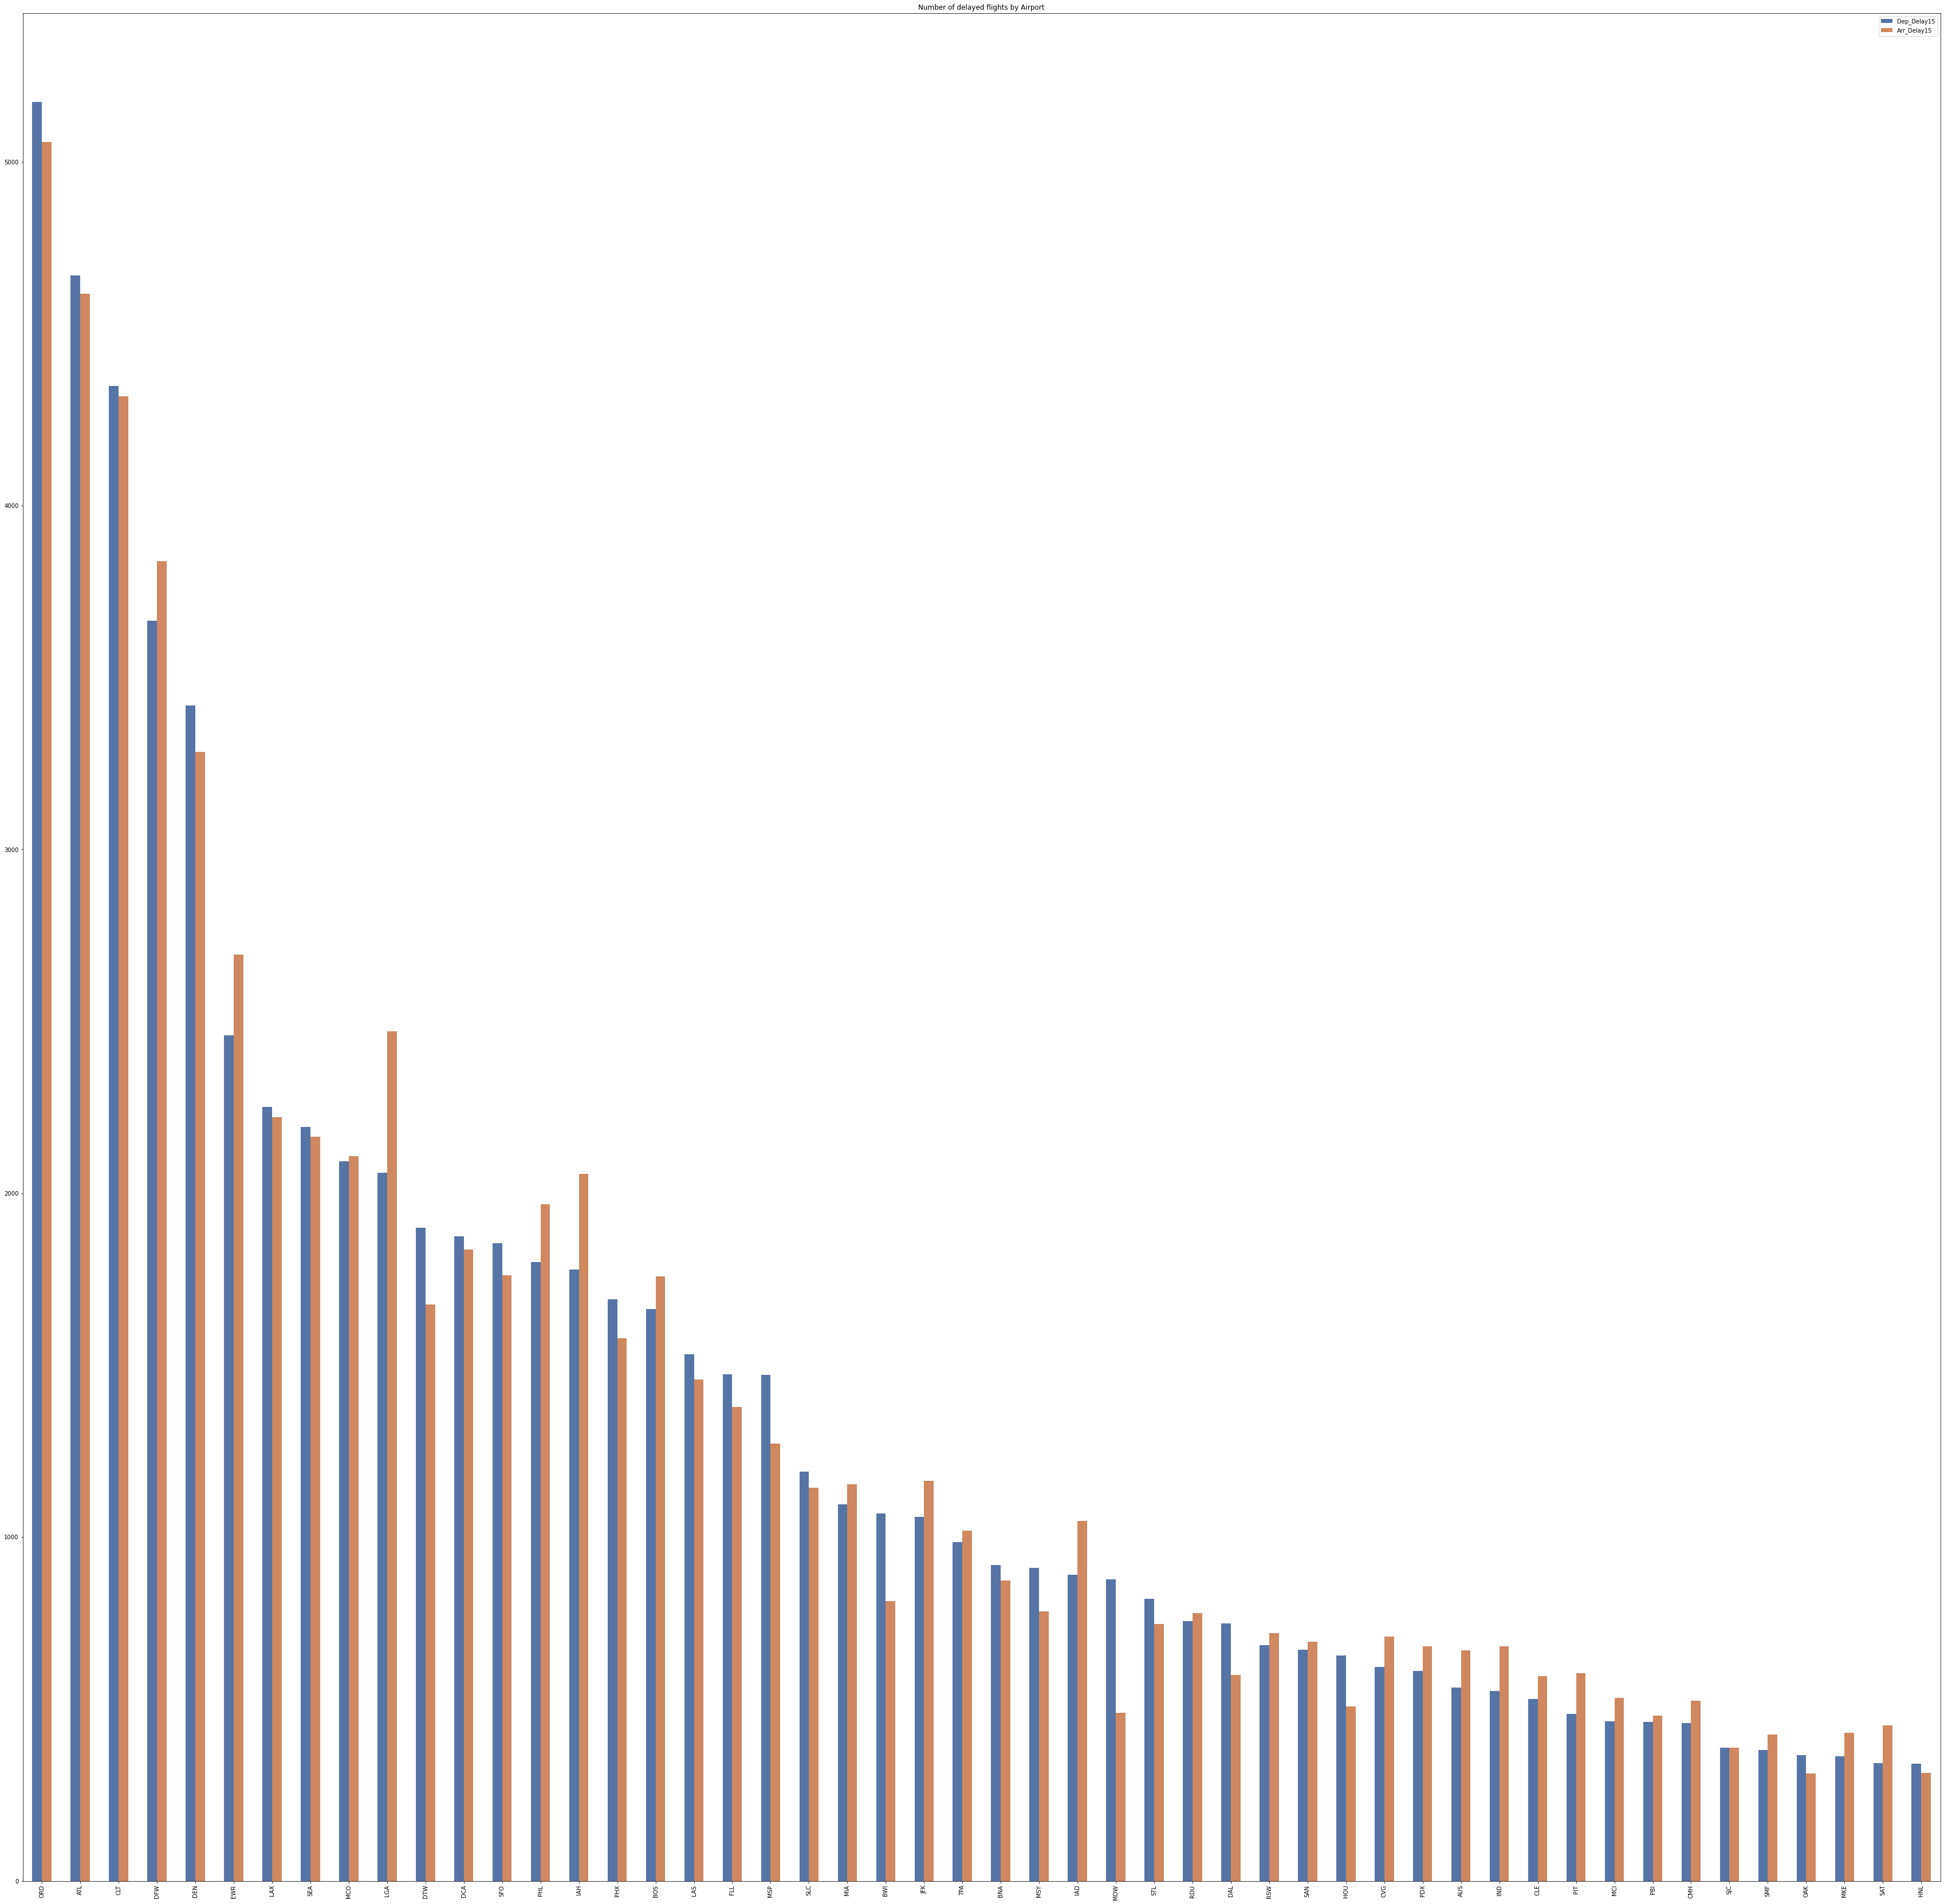

In [197]:
fig, ax = plt.subplots(figsize=(60,60))
Airport_DepDelayTop50_Feb20 .plot.bar(title='Number of delayed flights by Airport',ax=ax)


In [140]:
#Airport_Delay['Airport_code']=Airport_Delay['index'] #= Airport_Delay.rename('index' , 'Airport Code')